<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/Ames_house_pricing_analysis_step_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import sweetviz as sw

import seaborn as sns

Mounted at /content/drive


In [2]:
!pip install sweetviz

In [3]:
import sweetviz as sw


# **Subrutinok**

In [4]:
def checkvalues(columnname,key):
    print(f"{columnname} ellenőrzése !")
    numok=0
    numerr=0
    for i in df.index:
        if df.at[i,columnname] in key:
            #print(df.at[i,columnname])
            numok+=1
            pass
        else:
            numerr+=1
            print(df.at[i,columnname],end=", ")
    sumall=numok+numerr
    print(f"\n{sumall} mintából {numerr} db nem volt megfelelő")

In [5]:
def createcolumn(columnname,keys):
    for key in keys:
        df[keys[key]]=0.0
    for key in keys:
        for i in df.index:
            if df.at[i,columnname]==key:
                df.at[i,keys[key]]=1.0

# **Adattisztítás**

In [6]:
# Annyi mindent csináltunk, itt újraolvasom...
df=pd.read_csv("/content/drive/My Drive/001_AI/05_AI/hazi/train.csv")
#df.head()

#correlationMAt=df.corr()
#print(correlationMAt)

In [7]:
a=set(df["Neighborhood"])
#print(a)
#df.mean()
salePrice_by_Neighborhood=df.groupby("Neighborhood")[["SalePrice"]].describe()
#print(salePrice_by_Neighborhood)

#print(salePrice_by_Neighborhood[("SalePrice","mean")])
salePrice_by_Neighborhood.columns=salePrice_by_Neighborhood.columns.droplevel(0)
#print(salePrice_by_Neighborhood.columns)
dfs=salePrice_by_Neighborhood["mean"]
#print(dfs)
dfs2=dfs.sort_values(0)
#print(dfs2)
dfs2_enum=dfs2.index
rangsor={i:index for index,i in enumerate(dfs2_enum)}
print(rangsor)

{'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'Sawyer': 6, 'Blueste': 7, 'SWISU': 8, 'NPkVill': 9, 'NAmes': 10, 'Mitchel': 11, 'SawyerW': 12, 'NWAmes': 13, 'Gilbert': 14, 'Blmngtn': 15, 'CollgCr': 16, 'Crawfor': 17, 'ClearCr': 18, 'Somerst': 19, 'Veenker': 20, 'Timber': 21, 'StoneBr': 22, 'NridgHt': 23, 'NoRidge': 24}


**És megvan a kerületek rangsora... :-)**

# **Tegyük bele a Dataframe-be **

In [8]:
# Annyi mindent csináltunk, itt újraolvasom...
df=pd.read_csv("/content/drive/My Drive/001_AI/05_AI/hazi/train.csv")
#df.head()

for neigh_name in rangsor:
    df[neigh_name]=0.0
for neigh_name in rangsor:
    print(neigh_name)
    for i in df.index:
        if df.at[i,"Neighborhood"]==neigh_name:
            df.at[i,neigh_name]=1
            
#print(df["Neighborhood"])  kiírjuk, hogy számok lettek -e

MeadowV
IDOTRR
BrDale
BrkSide
Edwards
OldTown
Sawyer
Blueste
SWISU
NPkVill
NAmes
Mitchel
SawyerW
NWAmes
Gilbert
Blmngtn
CollgCr
Crawfor
ClearCr
Somerst
Veenker
Timber
StoneBr
NridgHt
NoRidge


In [9]:
#df.head()

# Adattisztítás: **KitchenQual**


* Ex	Excellent
* Gd	Good
* TA	Typical/Average
* Fa	Fair
* Po	Poor




In [10]:
keys={"Ex":"KitchenQual_Ex", "Gd":"KitchenQual_Gd", "TA":"KitchenQual_Ta","Fa":"KitchenQual_Fa","Po":"KitchenQual_Po"}
idx="KitchenQual"
checkvalues(idx,keys)
#print(df[idx])
createcolumn(idx,keys)

KitchenQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Street**: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [11]:
key={"Grvl":"Street_Grvl", "Pave":"Street_Pave"}
columnname="Street"
checkvalues(columnname,key)
createcolumn(columnname,key)

Street ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Alley**: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [12]:
key={"Grvl":"Alley_Grvl", "Pave":"Alley_Pave", "Na":"Alley_NA"}
columnname="Alley"
checkvalues(columnname,key)
#createcolumn(columnname,key)
df.drop(columns=["Alley"], inplace=True)
df.head()

Alley ellenőrzése !
nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MeadowV,IDOTRR,BrDale,BrkSide,Edwards,OldTown,Sawyer,Blueste,SWISU,NPkVill,NAmes,Mitchel,SawyerW,NWAmes,Gilbert,Blmngtn,CollgCr,Crawfor,ClearCr,Somerst,Veenker,Timber,StoneBr,NridgHt,NoRidge,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_Ta,KitchenQual_Fa,KitchenQual_Po,Street_Grvl,Street_Pave
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,NaN,NaN,0,2,2008,WD,Normal,208500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,NaN,NaN,0,5,2007,WD,Normal,181500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,NaN,NaN,0,9,2008,WD,Normal,223500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,...,NaN,NaN,0,12,2008,WD,Normal,250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Adattisztítás: **ExterQual**
* Ex Excellent
* Gd Good
* TA Typical/Average
* Fa Fair
* Po Poor

In [13]:



key={"Ex":"ExterQual_Ex", "Gd":"ExterQual_Gd", "TA":"ExterQual_TA","Fa":"ExterQual_Fa","Po":"ExterQual_Po"}
columnname="ExterQual"
checkvalues(columnname,key)

ExterQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő


In [14]:
createcolumn(columnname,key)

# **BsmtQual: Evaluates the height of the basement**

* Ex	Excellent (100+ inches)	
* Gd	Good (90-99 inches)
* TA	Typical (80-89 inches)
* Fa	Fair (70-79 inches)
* Po	Poor (<70 inches
* NA	No Basement

In [15]:
key={"Ex":"BsmtQual_Ex", "Gd":"BsmtQual_Gd", "TA":"BsmtQual_TA","Fa":"BsmtQual_Fa","Po":"BsmtQual_Po","NA":"BsmtQual_NA", np.nan:"BsmtQual_Nan" }
idx="BsmtQual"
checkvalues(idx,key)

BsmtQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő


In [16]:
createcolumn(idx,key)

# Adattisztítás: **FireplaceQu**


* Ex	Excellent
* Gd	Good
* TA	Typical/Average
* Fa	Fair
* Po	Poor
* No Fireplace


In [17]:
key={"Ex":"FireplaceQu_Ex", "Gd":"FireplaceQu_Gd", "TA":"FireplaceQu_TA","Fa":"FireplaceQu_Fa","Po":"FireplaceQu_Po", "No":"FireplaceQu_No", np.nan:"FireplaceQu_Nan"}
idx="FireplaceQu"
checkvalues(idx,key)
createcolumn(idx,key)

FireplaceQu ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Foundation: Type of foundation**
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [18]:
key={"BrkTil":"Foundation_BrkTil", "CBlock":"Foundation_CBlock","PConc":"Foundation_PConc","Slab":"Foundation_Slab","Stone":"Foundation_Stone", "Wood":"Foundation_"}
col="Foundation"
checkvalues(col,key)
createcolumn(col,key)

Foundation ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **GarageQual: Garage quality**

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [19]:

key={"Ex":"GarageQual_Ex", "Gd":"GarageQual_Gd", "TA":"GarageQual_TA","Fa":"GarageQual_Fa","Po":"GarageQual_Po","NA":"GarageQual_NA", np.nan:"GarageQual_Nan"}
idx="GarageQual"
checkvalues(idx,key)
createcolumn(idx,key)

GarageQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **GarageFinish: Interior finish of the garage**

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [20]:
key={"Fin":"GarageFinish_Fin","RFn":"GarageFinish_RFn","Unf":"GarageFinish_Unf","NA":"GarageFinish_NA",np.nan:"GarageFinish_Nan"}
idx="GarageFinish"
checkvalues(idx,key)
createcolumn(idx,key)

GarageFinish ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **BsmtCond**: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [21]:
key={"Ex":"BsmtCond_Ex","Gd":"BsmtCond_Gd","TA":"BsmtCond_TA","Fa":"BsmtCond_Fa" ,"Po":"BsmtCond_Po",np.nan:"BsmtCond_NA"}
idx="BsmtCond"
checkvalues(idx,key)
createcolumn(idx,key)

BsmtCond ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **ExterCond**: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

In [22]:
key={"Ex":"ExterCond_Ex","Gd":"ExterCond_Gd","TA":"ExterCond_TA","Fa":"ExterCond_FA" ,"Po":"ExterCond_Po"}
idx="ExterCond"
checkvalues(idx,key)
createcolumn(idx,key)

ExterCond ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Heating**: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [23]:
key={"Floor":"Heating_Floor","GasA":"Heating_GasA","GasW":"Heating_GasW","Grav":"Heating_Grav" ,"OthW":"Heating_OthW","Wall":"Heating_Wall"}
idx="Heating"
checkvalues(idx,key)
createcolumn(idx,key)

Heating ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **HeatingQC**: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [24]:
key={"Ex":"HeatingQC_Ex","Gd":"HeatingQC_Gd","TA":"HeatingQC_TA","Fa":"HeatingQC_FA" ,"Po":"HeatingQC_Po"}
idx="HeatingQC"
checkvalues(idx,key)
createcolumn(idx,key)

HeatingQC ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **CentralAir**: Central air conditioning

       N	No
       Y	Yes

In [25]:
key={"N":"CentralAir_N","Y":"CentralAir_Y"}
idx="CentralAir"
checkvalues(idx,key)
createcolumn(idx,key)

CentralAir ellenőrzése !

1460 mintából 0 db nem volt megfelelő



# **Functional**: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		

In [26]:
key={"Typ":"Functional_Typ","Min1":"Functional_Min1","Min2":"Functional_Min2","Mod":"Functional_Mod" ,"Maj1":"Functional_Maj1","Maj2":"Functional_Maj2","Sev":"Functional_Sev","Sal":"Functional_Sal"}
idx="Functional"
checkvalues(idx,key)
createcolumn(idx,key)

Functional ellenőrzése !

1460 mintából 0 db nem volt megfelelő


GarageYrBlt: Year garage was built

In [27]:
for i in df.index:
    if pd.isna(df.loc[i,'GarageYrBlt']):
        print("NANAN")
        df.loc[i,"GarageYrBlt"]=1111
    else:
        print(f"<{i},{df.loc[i,'GarageYrBlt']} ,{df.loc[i,'GarageType']}>" ,end=", ")

<0,2003.0 ,Attchd>, <1,1976.0 ,Attchd>, <2,2001.0 ,Attchd>, <3,1998.0 ,Detchd>, <4,2000.0 ,Attchd>, <5,1993.0 ,Attchd>, <6,2004.0 ,Attchd>, <7,1973.0 ,Attchd>, <8,1931.0 ,Detchd>, <9,1939.0 ,Attchd>, <10,1965.0 ,Detchd>, <11,2005.0 ,BuiltIn>, <12,1962.0 ,Detchd>, <13,2006.0 ,Attchd>, <14,1960.0 ,Attchd>, <15,1991.0 ,Detchd>, <16,1970.0 ,Attchd>, <17,1967.0 ,CarPort>, <18,2004.0 ,Detchd>, <19,1958.0 ,Attchd>, <20,2005.0 ,BuiltIn>, <21,1930.0 ,Attchd>, <22,2002.0 ,Attchd>, <23,1976.0 ,Attchd>, <24,1968.0 ,Attchd>, <25,2007.0 ,Attchd>, <26,2005.0 ,Detchd>, <27,2008.0 ,Attchd>, <28,1957.0 ,Attchd>, <29,1920.0 ,Detchd>, <30,1920.0 ,Detchd>, <31,1966.0 ,Attchd>, <32,2007.0 ,Attchd>, <33,1959.0 ,Attchd>, <34,2005.0 ,Attchd>, <35,2004.0 ,BuiltIn>, <36,1995.0 ,Attchd>, <37,1954.0 ,Attchd>, <38,1953.0 ,Detchd>, NANAN
<40,1965.0 ,Attchd>, <41,1959.0 ,Attchd>, <42,1983.0 ,Attchd>, <43,1977.0 ,Detchd>, <44,1959.0 ,Attchd>, <45,2005.0 ,Attchd>, <46,2003.0 ,Attchd>, <47,2006.0 ,Attchd>, NANAN
<49,196

# **Visszateszt**

In [28]:
for i in df.index:
    if pd.isna(df.loc[i,'GarageYrBlt']):
        print("NANAN")
        df.loc[i,"GarageYrBlt"]=1111
    else:
        print(f"<{i},{df.loc[i,'GarageYrBlt']} ,{df.loc[i,'GarageType']}>" ,end=", ")

<0,2003.0 ,Attchd>, <1,1976.0 ,Attchd>, <2,2001.0 ,Attchd>, <3,1998.0 ,Detchd>, <4,2000.0 ,Attchd>, <5,1993.0 ,Attchd>, <6,2004.0 ,Attchd>, <7,1973.0 ,Attchd>, <8,1931.0 ,Detchd>, <9,1939.0 ,Attchd>, <10,1965.0 ,Detchd>, <11,2005.0 ,BuiltIn>, <12,1962.0 ,Detchd>, <13,2006.0 ,Attchd>, <14,1960.0 ,Attchd>, <15,1991.0 ,Detchd>, <16,1970.0 ,Attchd>, <17,1967.0 ,CarPort>, <18,2004.0 ,Detchd>, <19,1958.0 ,Attchd>, <20,2005.0 ,BuiltIn>, <21,1930.0 ,Attchd>, <22,2002.0 ,Attchd>, <23,1976.0 ,Attchd>, <24,1968.0 ,Attchd>, <25,2007.0 ,Attchd>, <26,2005.0 ,Detchd>, <27,2008.0 ,Attchd>, <28,1957.0 ,Attchd>, <29,1920.0 ,Detchd>, <30,1920.0 ,Detchd>, <31,1966.0 ,Attchd>, <32,2007.0 ,Attchd>, <33,1959.0 ,Attchd>, <34,2005.0 ,Attchd>, <35,2004.0 ,BuiltIn>, <36,1995.0 ,Attchd>, <37,1954.0 ,Attchd>, <38,1953.0 ,Detchd>, <39,1111.0 ,nan>, <40,1965.0 ,Attchd>, <41,1959.0 ,Attchd>, <42,1983.0 ,Attchd>, <43,1977.0 ,Detchd>, <44,1959.0 ,Attchd>, <45,2005.0 ,Attchd>, <46,2003.0 ,Attchd>, <47,2006.0 ,Attchd>, <

# **MasVnrArea: Masonry veneer area in square feet**

In [29]:
# Van néhány NaN ebben a kategóriában. 0-val helyettesítem, majd meglátjuk.
# Lehet van korreláció ez és valami más között, ha igen meg lehetne predikálni


code="MasVnrArea"
for i in df.index:
    if pd.isna(df.loc[i,code]):
        print(f"<{i},{df.loc[i,code]}>" ,end=", ")
        df.loc[i,code]=df.loc[i,"LotArea"]**0.5
    else:
        pass
        #print(f"<{i},{df.loc[i,code]}>" ,end=", ")

<234,nan>, <529,nan>, <650,nan>, <936,nan>, <973,nan>, <977,nan>, <1243,nan>, <1278,nan>, 

# LotFrontage: Linear feet of street connected to **property**

In [30]:
# Van néhány NaN ebben a kategóriában is. sqrt-val helyettesítem, majd meglátjuk.
# Lehet van korreláció ez és valami más között, ha igen meg lehetne predikálni


code="LotFrontage"
for i in df.index:
    if pd.isna(df.loc[i,code]):
        print(f"<{i},{df.loc[i,code]}>" ,end=", ")
        df.loc[i,code]=100
    else:
        pass
        #print(f"<{i},{df.loc[i,code]}>" ,end=", ")

<7,nan>, <12,nan>, <14,nan>, <16,nan>, <24,nan>, <31,nan>, <42,nan>, <43,nan>, <50,nan>, <64,nan>, <66,nan>, <76,nan>, <84,nan>, <95,nan>, <100,nan>, <104,nan>, <111,nan>, <113,nan>, <116,nan>, <120,nan>, <126,nan>, <131,nan>, <133,nan>, <136,nan>, <147,nan>, <149,nan>, <152,nan>, <153,nan>, <160,nan>, <166,nan>, <169,nan>, <170,nan>, <177,nan>, <180,nan>, <186,nan>, <191,nan>, <203,nan>, <207,nan>, <208,nan>, <214,nan>, <218,nan>, <221,nan>, <234,nan>, <237,nan>, <244,nan>, <249,nan>, <269,nan>, <287,nan>, <288,nan>, <293,nan>, <307,nan>, <308,nan>, <310,nan>, <319,nan>, <328,nan>, <330,nan>, <335,nan>, <342,nan>, <346,nan>, <347,nan>, <351,nan>, <356,nan>, <360,nan>, <361,nan>, <364,nan>, <366,nan>, <369,nan>, <370,nan>, <375,nan>, <384,nan>, <392,nan>, <393,nan>, <404,nan>, <405,nan>, <412,nan>, <421,nan>, <426,nan>, <447,nan>, <452,nan>, <457,nan>, <458,nan>, <459,nan>, <465,nan>, <470,nan>, <484,nan>, <490,nan>, <496,nan>, <516,nan>, <518,nan>, <529,nan>, <537,nan>, <538,nan>, <53

# **SaleCondition: Condition of sale**

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [31]:

for j,i in enumerate(df.columns):
    print(j, i)
pos=78
countNorm=0
countAbnorm=0
code="SaleCondition"
for i in df.index:
    if df.loc[i,code]=="Normal":
        print(f"<{i},{df.loc[i,code]}>" ,end=", ")
        if countNorm%20==0:
            print("")
        countNorm+=1
    else:
        pass
        countAbnorm+=1
        print(f"<{i},{df.loc[i,code]}>" ,end=", ")
        df.drop(labels=i, inplace=True)
print(f"\nAbnormál: {countAbnorm}, Normál: {countNorm}")

#df.dropna(inplace=True)

0 Id
1 MSSubClass
2 MSZoning
3 LotFrontage
4 LotArea
5 Street
6 LotShape
7 LandContour
8 Utilities
9 LotConfig
10 LandSlope
11 Neighborhood
12 Condition1
13 Condition2
14 BldgType
15 HouseStyle
16 OverallQual
17 OverallCond
18 YearBuilt
19 YearRemodAdd
20 RoofStyle
21 RoofMatl
22 Exterior1st
23 Exterior2nd
24 MasVnrType
25 MasVnrArea
26 ExterQual
27 ExterCond
28 Foundation
29 BsmtQual
30 BsmtCond
31 BsmtExposure
32 BsmtFinType1
33 BsmtFinSF1
34 BsmtFinType2
35 BsmtFinSF2
36 BsmtUnfSF
37 TotalBsmtSF
38 Heating
39 HeatingQC
40 CentralAir
41 Electrical
42 1stFlrSF
43 2ndFlrSF
44 LowQualFinSF
45 GrLivArea
46 BsmtFullBath
47 BsmtHalfBath
48 FullBath
49 HalfBath
50 BedroomAbvGr
51 KitchenAbvGr
52 KitchenQual
53 TotRmsAbvGrd
54 Functional
55 Fireplaces
56 FireplaceQu
57 GarageType
58 GarageYrBlt
59 GarageFinish
60 GarageCars
61 GarageArea
62 GarageQual
63 GarageCond
64 PavedDrive
65 WoodDeckSF
66 OpenPorchSF
67 EnclosedPorch
68 3SsnPorch
69 ScreenPorch
70 PoolArea
71 PoolQC
72 Fence
73 MiscFe

In [32]:
df1 = df[df.isna().any(axis=1)]
df2=df.count()
df1.head()
#print(df.isna())
print (df.isna().any(axis=0))

Id                 False
MSSubClass         False
MSZoning           False
LotFrontage        False
LotArea            False
                   ...  
Functional_Mod     False
Functional_Maj1    False
Functional_Maj2    False
Functional_Sev     False
Functional_Sal     False
Length: 181, dtype: bool


In [33]:
for i in range(len(df)):
    pass
    print(df.iloc[i,79])
    if df.iloc[i,79]=="Normal":
        print("Normal")
    else:
        print("bula")

208500
bula
181500
bula
223500
bula
250000
bula
143000
bula
307000
bula
200000
bula
118000
bula
129500
bula
144000
bula
157000
bula
132000
bula
149000
bula
90000
bula
159000
bula
139400
bula
230000
bula
129900
bula
154000
bula
256300
bula
134800
bula
306000
bula
207500
bula
68500
bula
40000
bula
149350
bula
179900
bula
165500
bula
277500
bula
309000
bula
145000
bula
153000
bula
170000
bula
144000
bula
130250
bula
141000
bula
319900
bula
249700
bula
127000
bula
177000
bula
114500
bula
110000
bula
385000
bula
130000
bula
180500
bula
196500
bula
124900
bula
101000
bula
202500
bula
140000
bula
219500
bula
317000
bula
180000
bula
226000
bula
80000
bula
225000
bula
244000
bula
129500
bula
185000
bula
144900
bula
107400
bula
91000
bula
135750
bula
127000
bula
136500
bula
110000
bula
193500
bula
153500
bula
245000
bula
126500
bula
168500
bula
260000
bula
174000
bula
123600
bula
109900
bula
163500
bula
133900
bula
204750
bula
185000
bula
214000
bula
94750
bula
128950
bula
205000
bula
178000
bul

In [34]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Checking NaN columns BEFORE Cleaning
print('Total Rows- BEFORE Cleaning: ', df.shape[0])
print('Total Columns- BEFORE Cleaning: ', df.shape[1], '\n')
nans = df.isnull().sum()
nans = nans[nans!=0]
print('Total NaN values - BEFORE Cleaning:\n',nans)

Total Rows- BEFORE Cleaning:  1198
Total Columns- BEFORE Cleaning:  181 

Total NaN values - BEFORE Cleaning:
 MasVnrType         4
BsmtQual          32
BsmtCond          32
BsmtExposure      33
BsmtFinType1      32
BsmtFinType2      33
Electrical         1
FireplaceQu      563
GarageType        61
GarageFinish      61
GarageQual        61
GarageCond        61
PoolQC          1195
Fence            957
MiscFeature     1148
dtype: int64


In [35]:
#@title Független változók száma { form-width: "50%", display-mode: "form" }
ndb =  60#@param {type:"integer"}


                         Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id                 1.000000    0.021128    -0.011383 -0.041924    -0.026901   
MSSubClass         0.021128    1.000000    -0.319012 -0.123579     0.058475   
LotFrontage       -0.011383   -0.319012     1.000000  0.283483     0.148376   
LotArea           -0.041924   -0.123579     0.283483  1.000000     0.084713   
OverallQual       -0.026901    0.058475     0.148376  0.084713     1.000000   
OverallCond       -0.011361   -0.072689    -0.023954 -0.001393    -0.067433   
YearBuilt         -0.026086    0.048499     0.117919  0.001370     0.525159   
YearRemodAdd      -0.029150    0.051057     0.034795 -0.000330     0.507083   
MasVnrArea        -0.041222    0.042362     0.133689  0.080863     0.358841   
BsmtFinSF1        -0.010414   -0.085727     0.174454  0.190825     0.195645   
BsmtFinSF2        -0.016279   -0.062395     0.043525  0.101337    -0.036379   
BsmtUnfSF         -0.010861   -0.128338     0.039634

<Figure size 720x720 with 0 Axes>

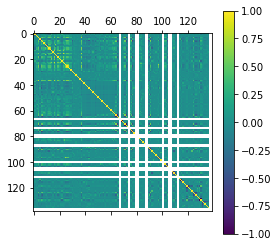

In [36]:
#ndb=110
correlacio=df.corr()
print(correlacio)
plt.figure(figsize=(10,10))

plt.matshow(correlacio)
plt.colorbar()
plt.show()
cordl=correlacio.nlargest(ndb,"SalePrice")
cords=correlacio.nsmallest(ndb,"SalePrice")


In [37]:
l1=list(cordl["SalePrice"].index)
print(l1)


['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea', 'KitchenQual_Ex', 'BsmtQual_Ex', 'HeatingQC_Ex', 'BsmtFinSF1', 'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt', 'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'FireplaceQu_Gd', 'CentralAir_Y', 'FireplaceQu_Ex', 'GarageQual_TA', 'FireplaceQu_TA', 'BsmtFullBath', 'BedroomAbvGr', 'BsmtUnfSF', 'GarageFinish_RFn', 'StoneBr', 'Timber', 'BsmtCond_TA', 'Somerst', 'ScreenPorch', 'Functional_Typ', 'ClearCr', 'CollgCr', 'Heating_GasA', 'Veenker', 'ExterCond_TA', 'Crawfor', 'BsmtCond_Gd', 'NWAmes', 'GarageQual_Gd', 'SawyerW', 'Gilbert', 'GarageQual_Ex', 'Street_Pave']


In [38]:
l2=list(cords["SalePrice"].index)
nlarge=list((l1+l2[1:]))

print(nlarge)
print(len(nlarge))


for i in df.columns:
    if i not in nlarge:
        df.drop(columns=[i], inplace=True)


df.head()

['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea', 'KitchenQual_Ex', 'BsmtQual_Ex', 'HeatingQC_Ex', 'BsmtFinSF1', 'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt', 'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'FireplaceQu_Gd', 'CentralAir_Y', 'FireplaceQu_Ex', 'GarageQual_TA', 'FireplaceQu_TA', 'BsmtFullBath', 'BedroomAbvGr', 'BsmtUnfSF', 'GarageFinish_RFn', 'StoneBr', 'Timber', 'BsmtCond_TA', 'Somerst', 'ScreenPorch', 'Functional_Typ', 'ClearCr', 'CollgCr', 'Heating_GasA', 'Veenker', 'ExterCond_TA', 'Crawfor', 'BsmtCond_Gd', 'NWAmes', 'GarageQual_Gd', 'SawyerW', 'Gilbert', 'GarageQual_Ex', 'Street_Pave', 'KitchenQual_Ta', 'BsmtQual_TA', 'GarageFinish_Unf', 'Foundation_CBlock', 'HeatingQC_TA', 'CentralAir_N', 'Foundation_BrkTil', 'Ed

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MeadowV,IDOTRR,BrDale,BrkSide,Edwards,OldTown,Sawyer,Blueste,SWISU,NPkVill,NAmes,Mitchel,SawyerW,NWAmes,Gilbert,CollgCr,Crawfor,ClearCr,Somerst,Veenker,Timber,StoneBr,NridgHt,NoRidge,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_Ta,KitchenQual_Fa,Street_Grvl,Street_Pave,ExterQual_Ex,ExterQual_Gd,ExterQual_Fa,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Fa,FireplaceQu_Ex,FireplaceQu_Gd,FireplaceQu_TA,FireplaceQu_Fa,FireplaceQu_Po,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_,GarageQual_Ex,GarageQual_Gd,GarageQual_TA,GarageQual_Fa,GarageQual_Po,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,BsmtCond_Gd,BsmtCond_TA,BsmtCond_Fa,BsmtCond_Po,ExterCond_Gd,ExterCond_TA,ExterCond_FA,ExterCond_Po,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,HeatingQC_FA,HeatingQC_Po,CentralAir_N,CentralAir_Y,Functional_Typ,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Maj1,Functional_Maj2
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,2008,208500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,2007,181500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,2008,223500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,2008,250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,0,0,700,10,2009,143000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Checking NaN columns BEFORE Cleaning
print('Total Rows- BEFORE Cleaning: ', df.shape[0])
print('Total Columns- BEFORE Cleaning: ', df.shape[1], '\n')
nans = df.isnull().sum()
nans = nans[nans!=0]
print('Total NaN values - BEFORE Cleaning:\n',nans)

Total Rows- BEFORE Cleaning:  1198
Total Columns- BEFORE Cleaning:  119 

Total NaN values - BEFORE Cleaning:
 Series([], dtype: int64)


In [40]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
print(df)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0          2003          2003 

In [41]:
df_minimal=df[nlarge]

#df=(df_minimal-df_minimal.min())/(df_minimal.max()-df_minimal.min())

df.replace(-np.inf,np.nan)
df.replace(np.inf,np.nan)
df.dropna()


X=df[nlarge[1:]]
#X=X.values.astype(np.float)
print(X.columns)
print(type(X))
Y=df[nlarge[0:1]]

print(Y.columns)
print(type(Y))



Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF',
       'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt',
       ...
       'FireplaceQu_Fa', 'LowQualFinSF', 'Heating_GasW', 'BsmtHalfBath',
       'Functional_Mod', 'Foundation_Stone', 'YrSold', 'Foundation_', 'MoSold',
       'PoolArea'],
      dtype='object', length=118)
<class 'pandas.core.frame.DataFrame'>
Index(['SalePrice'], dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [42]:
len(df.columns)
 

119

In [43]:
print(type(df))
print(nlarge)

df["SalePrice"]
df.columns

<class 'pandas.core.frame.DataFrame'>
['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea', 'KitchenQual_Ex', 'BsmtQual_Ex', 'HeatingQC_Ex', 'BsmtFinSF1', 'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt', 'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'FireplaceQu_Gd', 'CentralAir_Y', 'FireplaceQu_Ex', 'GarageQual_TA', 'FireplaceQu_TA', 'BsmtFullBath', 'BedroomAbvGr', 'BsmtUnfSF', 'GarageFinish_RFn', 'StoneBr', 'Timber', 'BsmtCond_TA', 'Somerst', 'ScreenPorch', 'Functional_Typ', 'ClearCr', 'CollgCr', 'Heating_GasA', 'Veenker', 'ExterCond_TA', 'Crawfor', 'BsmtCond_Gd', 'NWAmes', 'GarageQual_Gd', 'SawyerW', 'Gilbert', 'GarageQual_Ex', 'Street_Pave', 'KitchenQual_Ta', 'BsmtQual_TA', 'GarageFinish_Unf', 'Foundation_CBlock', 'HeatingQC_TA', 'C

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'HeatingQC_FA', 'HeatingQC_Po', 'CentralAir_N', 'CentralAir_Y',
       'Functional_Typ', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Maj1', 'Functional_Maj2'],
      dtype='object', length=119)

In [44]:
print(df)

sns.set()
print(df.head())
#sns.pairplot(df[nlarge[0:15]])
#plt.show()
Y

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0          2003          2003 

,SalePrice
0,208500
1,181500
2,223500
4,250000
5,143000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [45]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Checking NaN columns BEFORE Cleaning
print('Total Rows- BEFORE Cleaning: ', df.shape[0])
print('Total Columns- BEFORE Cleaning: ', df.shape[1], '\n')
nans = df.isnull().sum()
nans = nans[nans!=0]
print('Total NaN values - BEFORE Cleaning:\n',nans)

Total Rows- BEFORE Cleaning:  1198
Total Columns- BEFORE Cleaning:  119 

Total NaN values - BEFORE Cleaning:
 Series([], dtype: int64)


In [46]:
from sklearn import datasets, linear_model

print(df.describe())

alpha=0.0001


print(X)
print(Y)
for i in nlarge[0:0]:
    print(i,Y[i].sum())
print(df[["SalePrice"]])




lreg = linear_model.Ridge()  
lreg.fit(X,Y)
lreg_pred = lreg.predict(X)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1198.000000  1198.000000  1198.000000    1198.000000  1198.000000   
mean    733.630217    57.378965    75.232888   10543.478297     6.006678   
std     423.718386    42.495957    23.988336   10681.016803     1.318193   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     362.250000    20.000000    60.000000    7544.500000     5.000000   
50%     733.500000    50.000000    75.000000    9468.500000     6.000000   
75%    1098.750000    70.000000   100.000000   11451.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1198.000000  1198.000000   1198.000000  1198.000000  1198.000000   
mean      5.659432  1969.030885   1983.702003    96.542144   439.469115   
std       1.139790    29.493948     20.277577   175.672502   407.738366   
min       1.000

In [47]:
Y.describe()

,SalePrice
count,1198.000000
mean,175202.219533
std,69713.636280
min,39300.000000
25%,130000.000000
50%,160000.000000
75%,205000.000000
max,755000.000000


1198
count    1198.000000
mean       -0.485317
std        11.009726
min      -126.524460
25%        -5.894163
50%        -0.298226
75%         5.811896
max        62.252436
dtype: float64


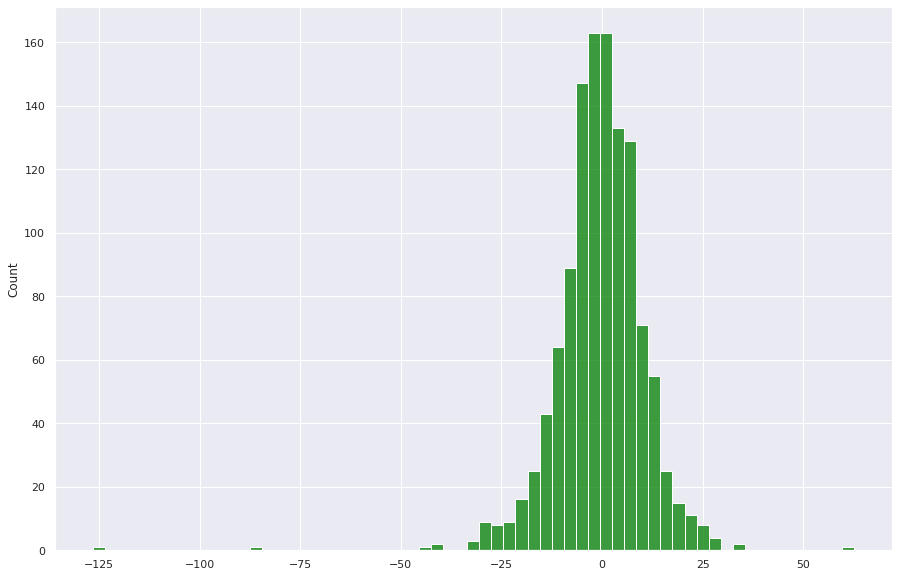

In [48]:
delta_list=[]
import seaborn as sns
h=len(df["SalePrice"])
print(h)
sns.set()
for i in range(h):
    #print(i)
    
    deltapercent=(Y.iloc[i,0]-lreg_pred[i])/Y.iloc[i,0]*100
    #print(f"{i} --{deltapercent}")
    delta_list.append(deltapercent[0])
       

plt.figure(figsize=(15,10))
sns.histplot(delta_list,color="green", binwidth=3,);

a=pd.Series(delta_list)
#print(endofparam,a.describe())
print(a.describe())

# **Ez eddig elég meggyőző! Lehet még rajta javítani?**

# **Outlier keresés**

In [49]:
#Outlier keresés
# hol is tatunk most az eredeti esetszámhoz képest?
print(f"Az aktuális esetszám: {max(df.index)}")
df.head()

Az aktuális esetszám: 1459


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MeadowV,IDOTRR,BrDale,BrkSide,Edwards,OldTown,Sawyer,Blueste,SWISU,NPkVill,NAmes,Mitchel,SawyerW,NWAmes,Gilbert,CollgCr,Crawfor,ClearCr,Somerst,Veenker,Timber,StoneBr,NridgHt,NoRidge,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_Ta,KitchenQual_Fa,Street_Grvl,Street_Pave,ExterQual_Ex,ExterQual_Gd,ExterQual_Fa,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Fa,FireplaceQu_Ex,FireplaceQu_Gd,FireplaceQu_TA,FireplaceQu_Fa,FireplaceQu_Po,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_,GarageQual_Ex,GarageQual_Gd,GarageQual_TA,GarageQual_Fa,GarageQual_Po,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,BsmtCond_Gd,BsmtCond_TA,BsmtCond_Fa,BsmtCond_Po,ExterCond_Gd,ExterCond_TA,ExterCond_FA,ExterCond_Po,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,HeatingQC_FA,HeatingQC_Po,CentralAir_N,CentralAir_Y,Functional_Typ,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Maj1,Functional_Maj2
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,2008,208500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,2007,181500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,2008,223500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,2008,250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,0,0,700,10,2009,143000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


# Ransac regresszió számol outliereket is!
# Nézzük mire megyünk vele!!

1198


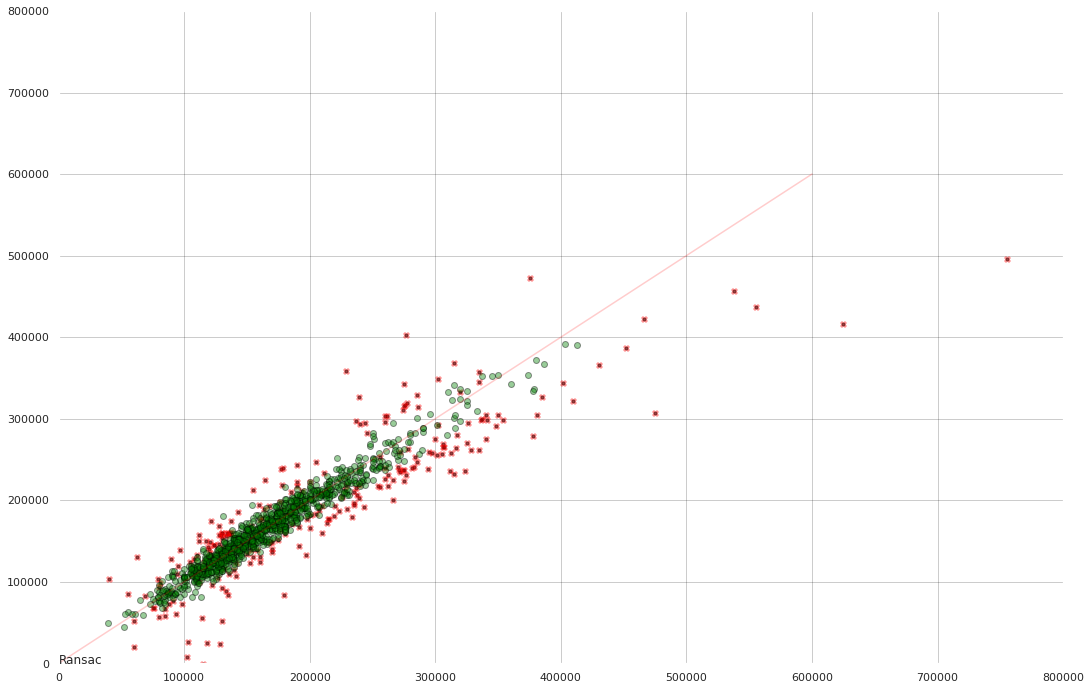

In [50]:
ransacreg = linear_model.RANSACRegressor()
ransacreg.fit(X, Y)
inlier_mask = ransacreg.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
ransacpred=ransacreg.predict(X)
plt.figure(figsize=(18,12))


plt.subplot(111, facecolor="white",)
plt.grid(color="black", alpha=0.2)
plt.plot([0,600000],[0,600000],c="red", alpha=0.2)

plt.scatter(Y[outlier_mask],ransacpred[:][outlier_mask],c="black",alpha=0.6,marker=".",)
plt.scatter(Y[outlier_mask],ransacpred[:][outlier_mask],c="red",alpha=0.3,marker="X")
plt.scatter(Y[inlier_mask],ransacpred[:][inlier_mask],c="green",alpha=0.4,marker="o",edgecolors="black")
#plt.scatter(df["Id"][inlier_mask],df["SalePrice"][inlier_mask],c="green",alpha=0.9,marker="o")
#plt.scatter(df["Id"],ransacpred[:],c="red",alpha=0.9,marker=".")

plt.text(0,0,"Ransac")
plt.xlim(0,800000)
plt.ylim(0,800000)

print(len(ransacpred))
plt.show()

In [51]:
outlierDB=sum(outlier_mask)
inlierDB=sum(inlier_mask)
independentDB=len(X.columns)
print(list(X.head()))

print(f"\nA összes mintából ({outlierDB+inlierDB}) RANSAC módszer alapján az outlierek száma: {outlierDB}. \n ")
print(f"Független változók száma: {independentDB}")
print(pd.DataFrame(ransacpred,columns=["Ransac Predictor"]).describe(),"\n\n\n",Y.describe())


['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea', 'KitchenQual_Ex', 'BsmtQual_Ex', 'HeatingQC_Ex', 'BsmtFinSF1', 'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt', 'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'FireplaceQu_Gd', 'CentralAir_Y', 'FireplaceQu_Ex', 'GarageQual_TA', 'FireplaceQu_TA', 'BsmtFullBath', 'BedroomAbvGr', 'BsmtUnfSF', 'GarageFinish_RFn', 'StoneBr', 'Timber', 'BsmtCond_TA', 'Somerst', 'ScreenPorch', 'Functional_Typ', 'ClearCr', 'CollgCr', 'Heating_GasA', 'Veenker', 'ExterCond_TA', 'Crawfor', 'BsmtCond_Gd', 'NWAmes', 'GarageQual_Gd', 'SawyerW', 'Gilbert', 'GarageQual_Ex', 'Street_Pave', 'KitchenQual_Ta', 'BsmtQual_TA', 'GarageFinish_Unf', 'Foundation_CBlock', 'HeatingQC_TA', 'CentralAir_N', 'Foundation_BrkTil', 'Edwards', 'NAme

# Ransacot kielemeztük 

# Nézzünk egy LASSO-t

In [52]:
from sklearn.linear_model import Lasso
alpha=0.001
lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e6)
lassoreg.fit(X,Y)
lassopred = lassoreg.predict(X)


1198


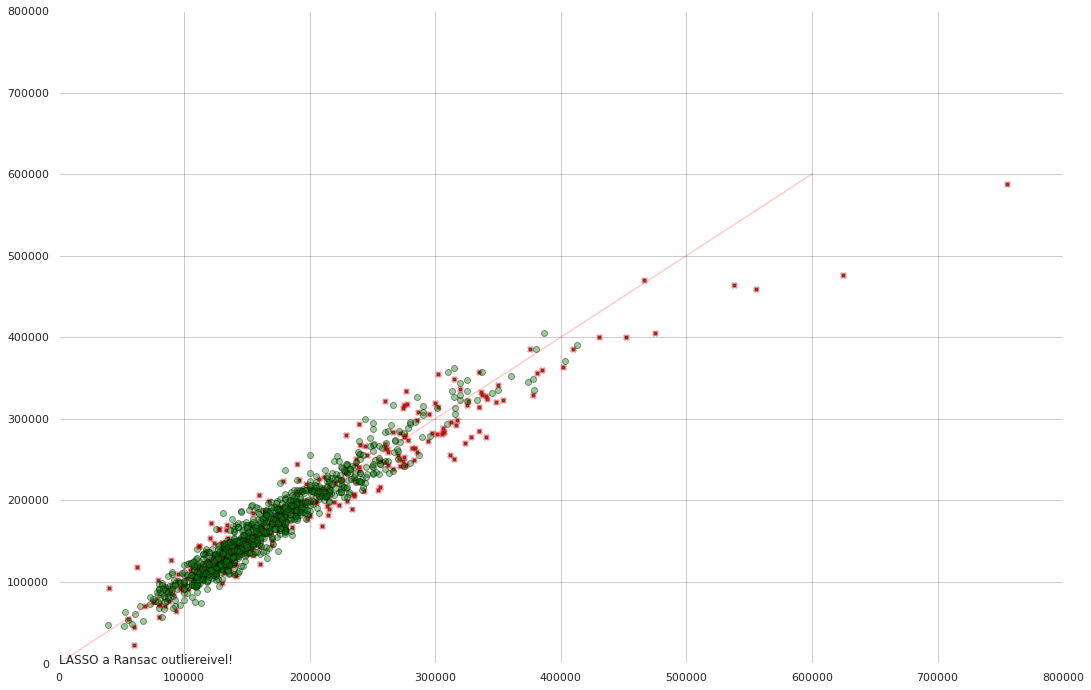

In [53]:
plt.figure(figsize=(18,12))


plt.subplot(111, facecolor="white",)
plt.grid(color="black", alpha=0.2)
plt.plot([0,600000],[0,600000],c="red", alpha=0.2)

plt.scatter(Y[outlier_mask],lassopred[:][outlier_mask],c="black",alpha=0.6,marker=".",)
plt.scatter(Y[outlier_mask],lassopred[:][outlier_mask],c="red",alpha=0.3,marker="X")
plt.scatter(Y[inlier_mask],lassopred[:][inlier_mask],c="green",alpha=0.4,marker="o",edgecolors="black")
#plt.scatter(df["Id"][inlier_mask],df["SalePrice"][inlier_mask],c="green",alpha=0.9,marker="o")
#plt.scatter(df["Id"],ransacpred[:],c="red",alpha=0.9,marker=".")

plt.text(0,0,"LASSO a Ransac outliereivel!")
plt.xlim(0,800000)
plt.ylim(0,800000)
plt

print(len(lassopred))
plt.show()

# **Nézzük mi van ha csak a fél adathalmazra tanítjuk**



---



In [92]:
divnum = 0.3 #@param {type:"slider", min:0, max:1, step:0.1}


In [93]:
#divnum=0.7
Ysize=len(Y)
divider=int(Ysize*divnum)
Y1=Y[0:divider]
Y2=Y[divider:]
X1=X[0:divider]
X2=X[divider:]


In [94]:
from sklearn.linear_model import Lasso
alpha=0.03
lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e6)
lassoreg.fit(X1,Y1)
lassopredY1 = lassoreg.predict(X1)
lassopredY2 = lassoreg.predict(X2)


In [104]:
a=f"Tanítási minta: {len(Y1)} db. Visszateszt: {len(Y2)} db! "
print(a)

Tanítási minta: 958 db. Visszateszt: 240 db! 


958


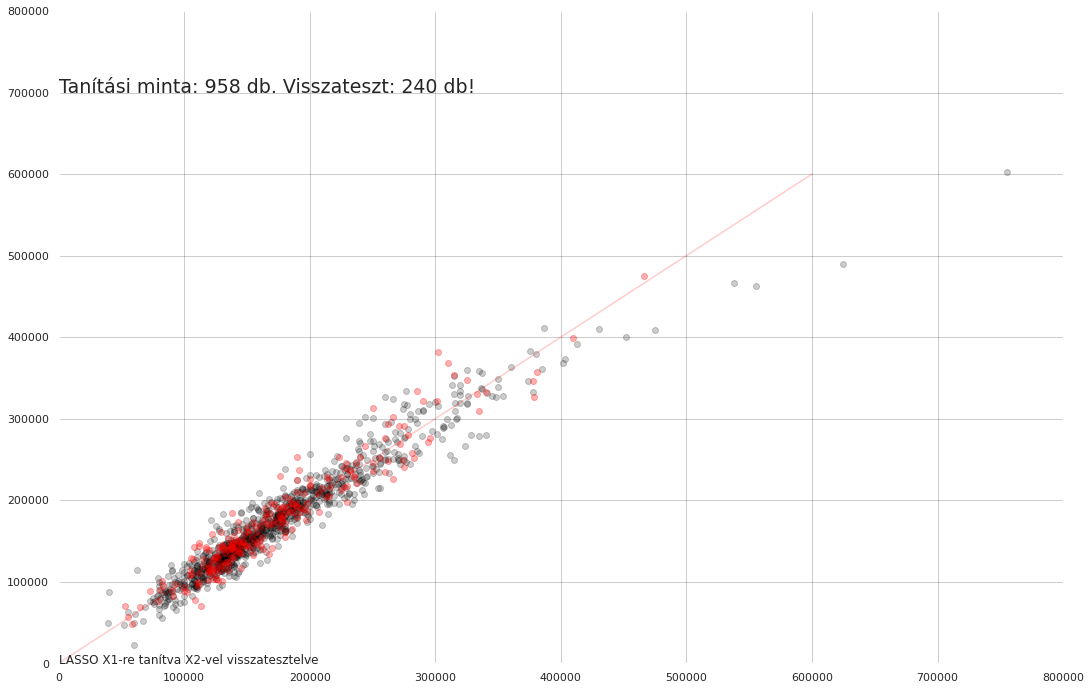

In [108]:
plt.figure(figsize=(18,12))


plt.subplot(111, facecolor="white",)
plt.grid(color="black", alpha=0.2)
plt.plot([0,600000],[0,600000],c="red", alpha=0.2)

plt.scatter(Y1,lassopredY1[:],c="black",alpha=0.2,marker="o",)
plt.scatter(Y2,lassopredY2[:],c="red",alpha=0.3,marker="o")
#plt.scatter(Y[inlier_mask],lassopred[:][inlier_mask],c="green",alpha=0.4,marker="o",edgecolors="black")
#plt.scatter(df["Id"][inlier_mask],df["SalePrice"][inlier_mask],c="green",alpha=0.9,marker="o")
#plt.scatter(df["Id"],ransacpred[:],c="red",alpha=0.9,marker=".")

plt.text(0,0,"LASSO X1-re tanítva X2-vel visszatesztelve")
plt.text(0,700000,a,fontsize=19)

plt.xlim(0,800000)
plt.ylim(0,800000)


print(len(lassopredY1))
plt.show()